In [334]:
!pip install matplotlib seaborn

You should consider upgrading via the '/Users/kk/Downloads/MLOPS-PROJECT-1/.venv/bin/python3 -m pip install --upgrade pip' command.


In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [336]:
import warnings
warnings.simplefilter("ignore")


In [337]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [338]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [339]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace = True)

In [340]:
df.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.0,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.5,2,Not_Canceled


In [341]:
df.shape


(29020, 18)

In [342]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [343]:
df.duplicated().sum()

np.int64(7661)

In [344]:
df.drop_duplicates(inplace=True)

In [345]:
df.duplicated().sum()

np.int64(0)

In [346]:
df.shape

(21359, 18)

In [347]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [348]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [349]:
df["no_of_children"].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [350]:
df["no_of_weekend_nights"].value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [351]:
df["no_of_week_nights"].value_counts()

no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

In [352]:
df["type_of_meal_plan"].value_counts()

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64

In [353]:
df["required_car_parking_space"].value_counts()

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

In [354]:
df["room_type_reserved"].value_counts()

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

In [355]:
df["arrival_year"].value_counts()

arrival_year
2018    18141
2017     3218
Name: count, dtype: int64

In [356]:
df["arrival_month"].value_counts()

arrival_month
10    2663
9     2525
8     2477
12    1928
7     1893
11    1817
4     1695
3     1611
6     1543
5     1522
2     1067
1      618
Name: count, dtype: int64

In [357]:
df["market_segment_type"].value_counts()

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64

In [358]:
df["repeated_guest"].value_counts()

repeated_guest
0    20667
1      692
Name: count, dtype: int64

In [359]:
df["no_of_previous_cancellations"].value_counts()

no_of_previous_cancellations
0     21135
1       115
2        36
3        32
11       20
5        10
4         9
13        1
6         1
Name: count, dtype: int64

In [360]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [361]:
### Our data is imbalanced ####

In [362]:
df.columns


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [363]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']


In [364]:
len(cat_cols)

6

In [365]:
len(num_cols)

12

In [366]:
### DATA ANALYSIS ####

In [367]:
data = df.copy()

In [368]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [369]:
#### UNIVARIATE ANALYSIS ####

In [370]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()


In [371]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

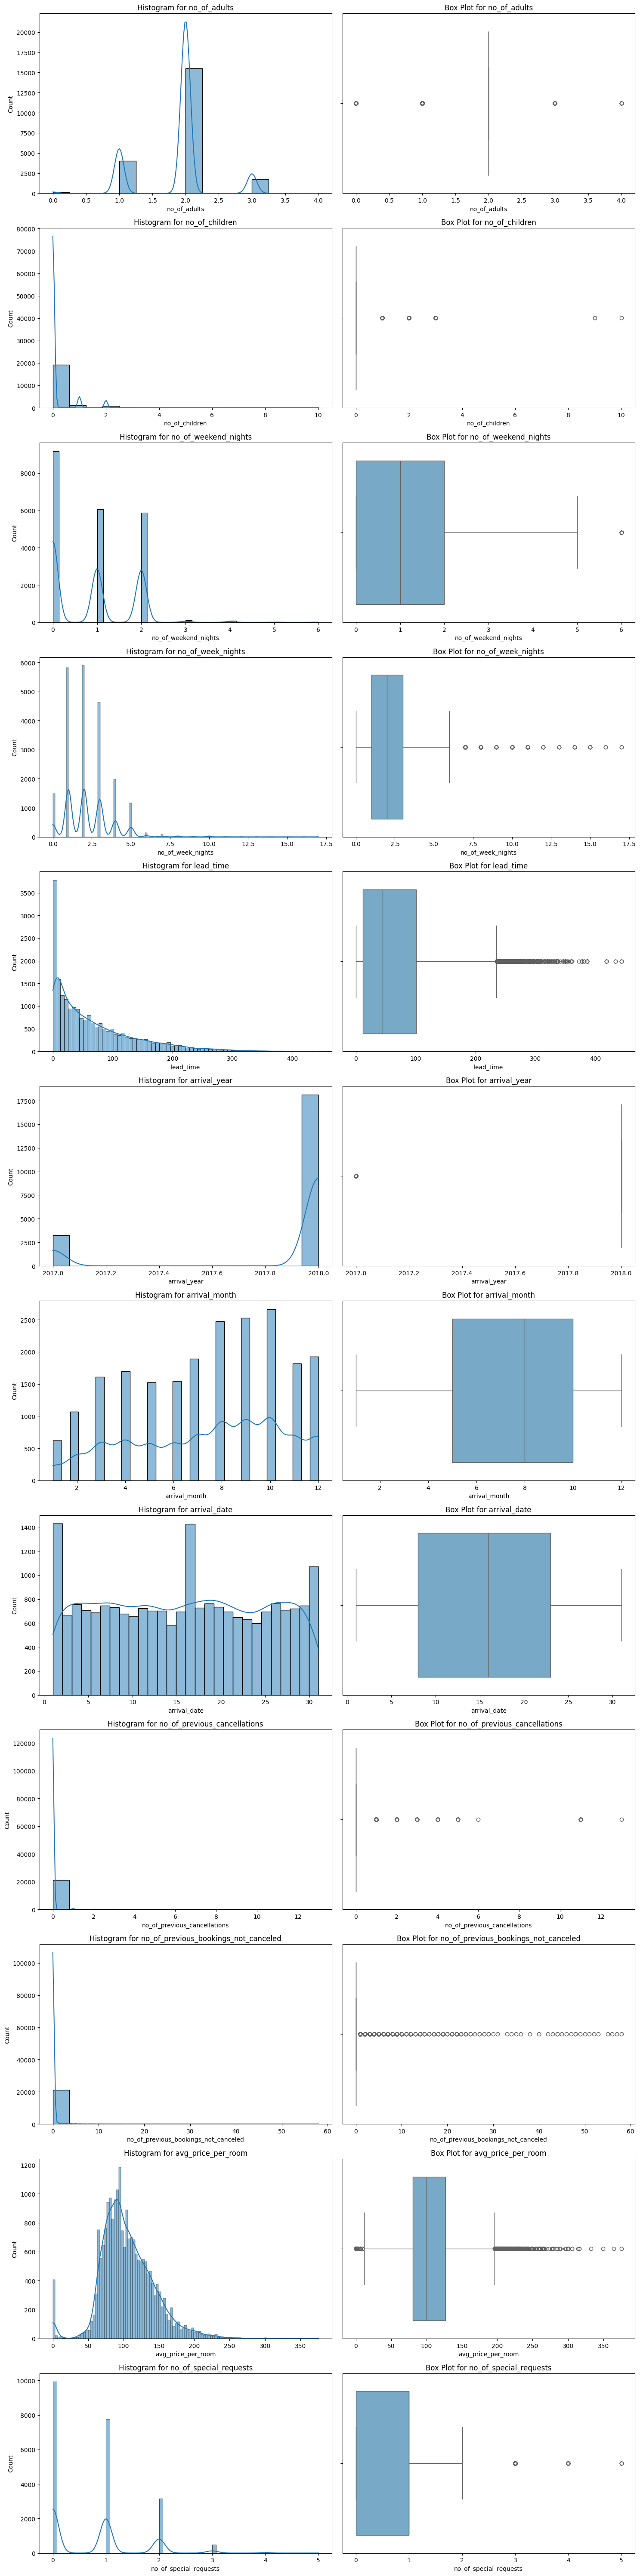

In [372]:
num_plot_dist(data, num_cols)

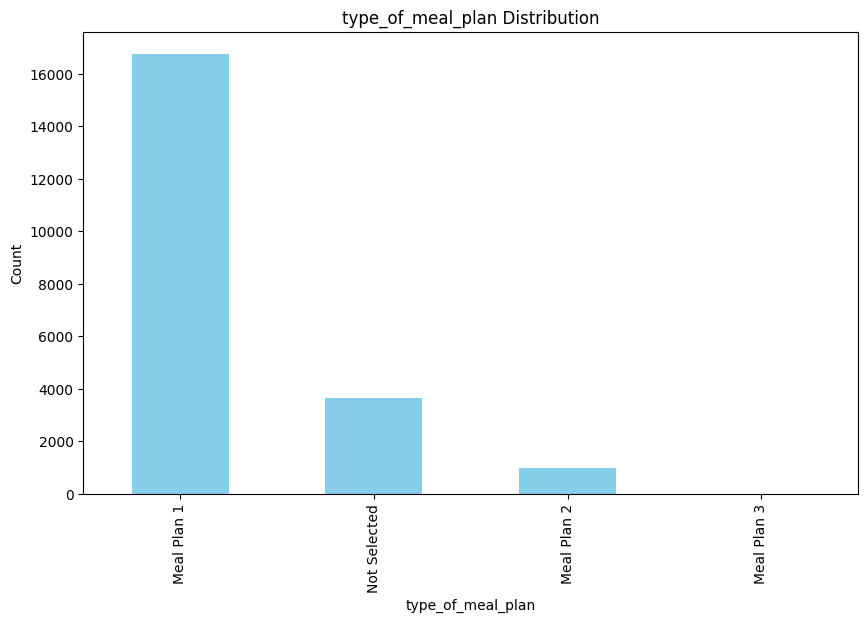

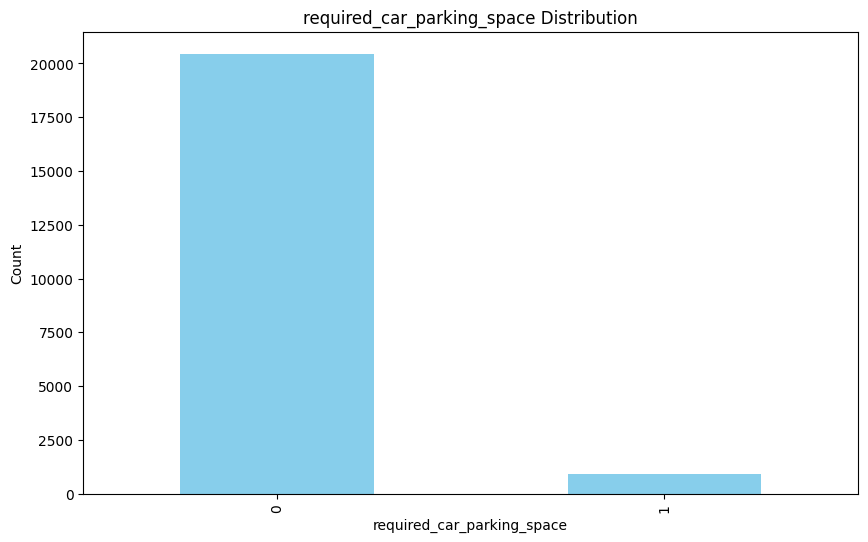

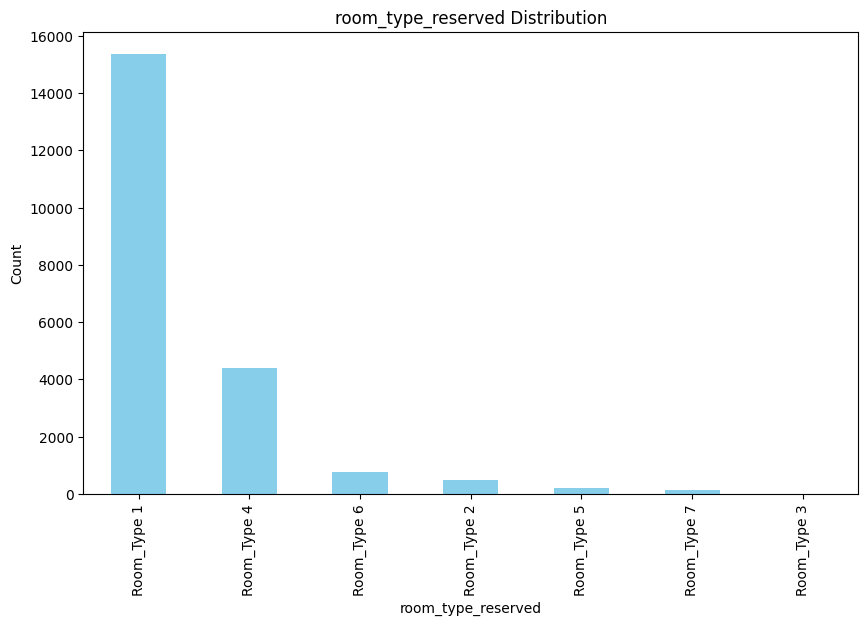

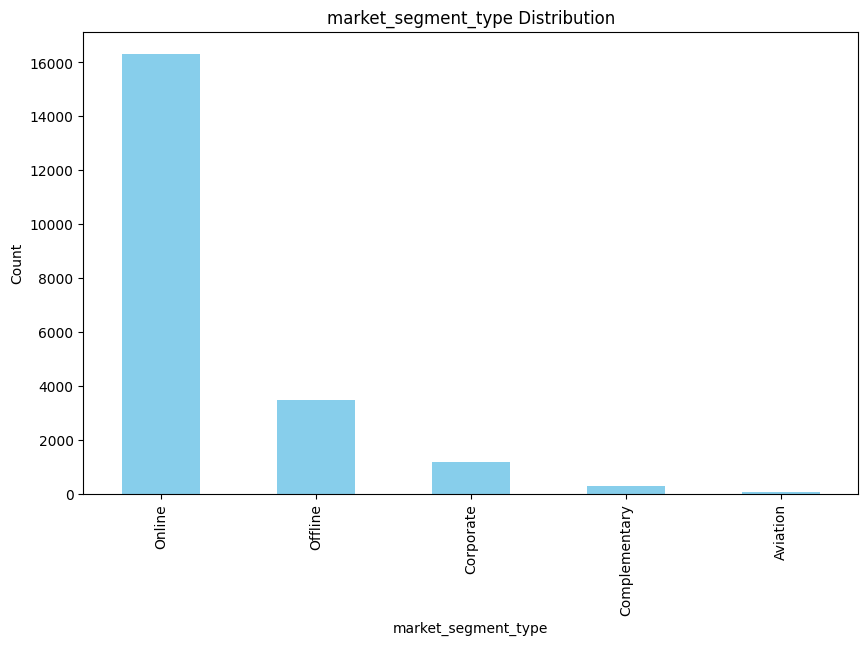

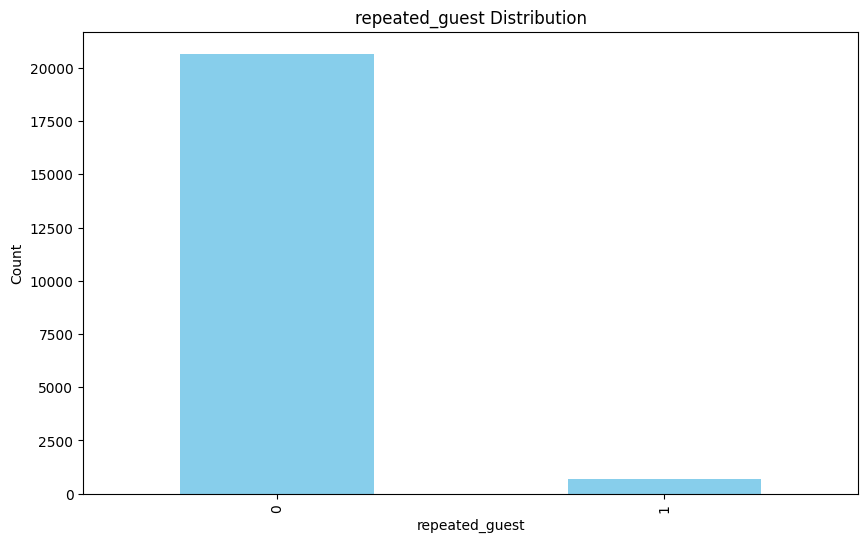

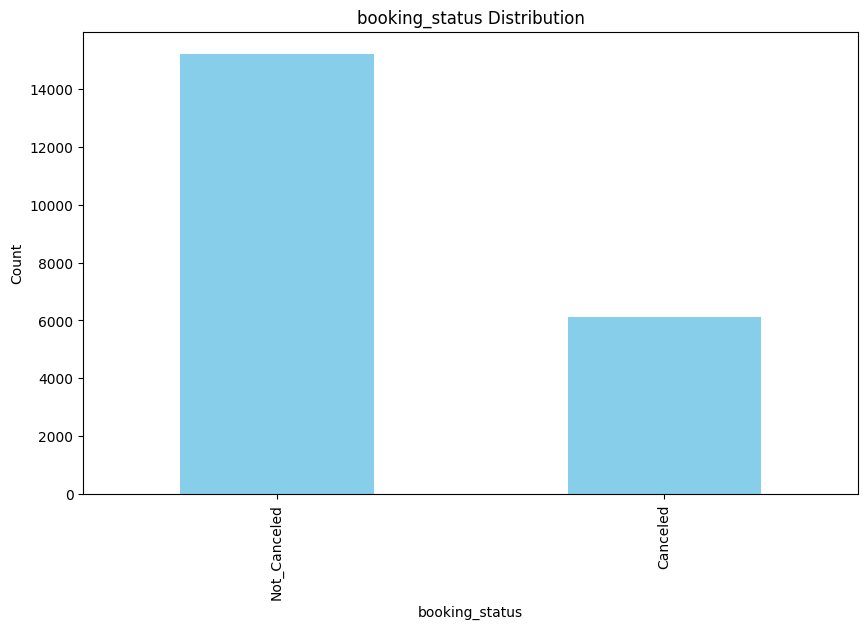

In [373]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

In [374]:
#### Bivariate Analysis

In [375]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(14, num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column} vs {target}")
    
    plt.tight_layout()
    plt.show()


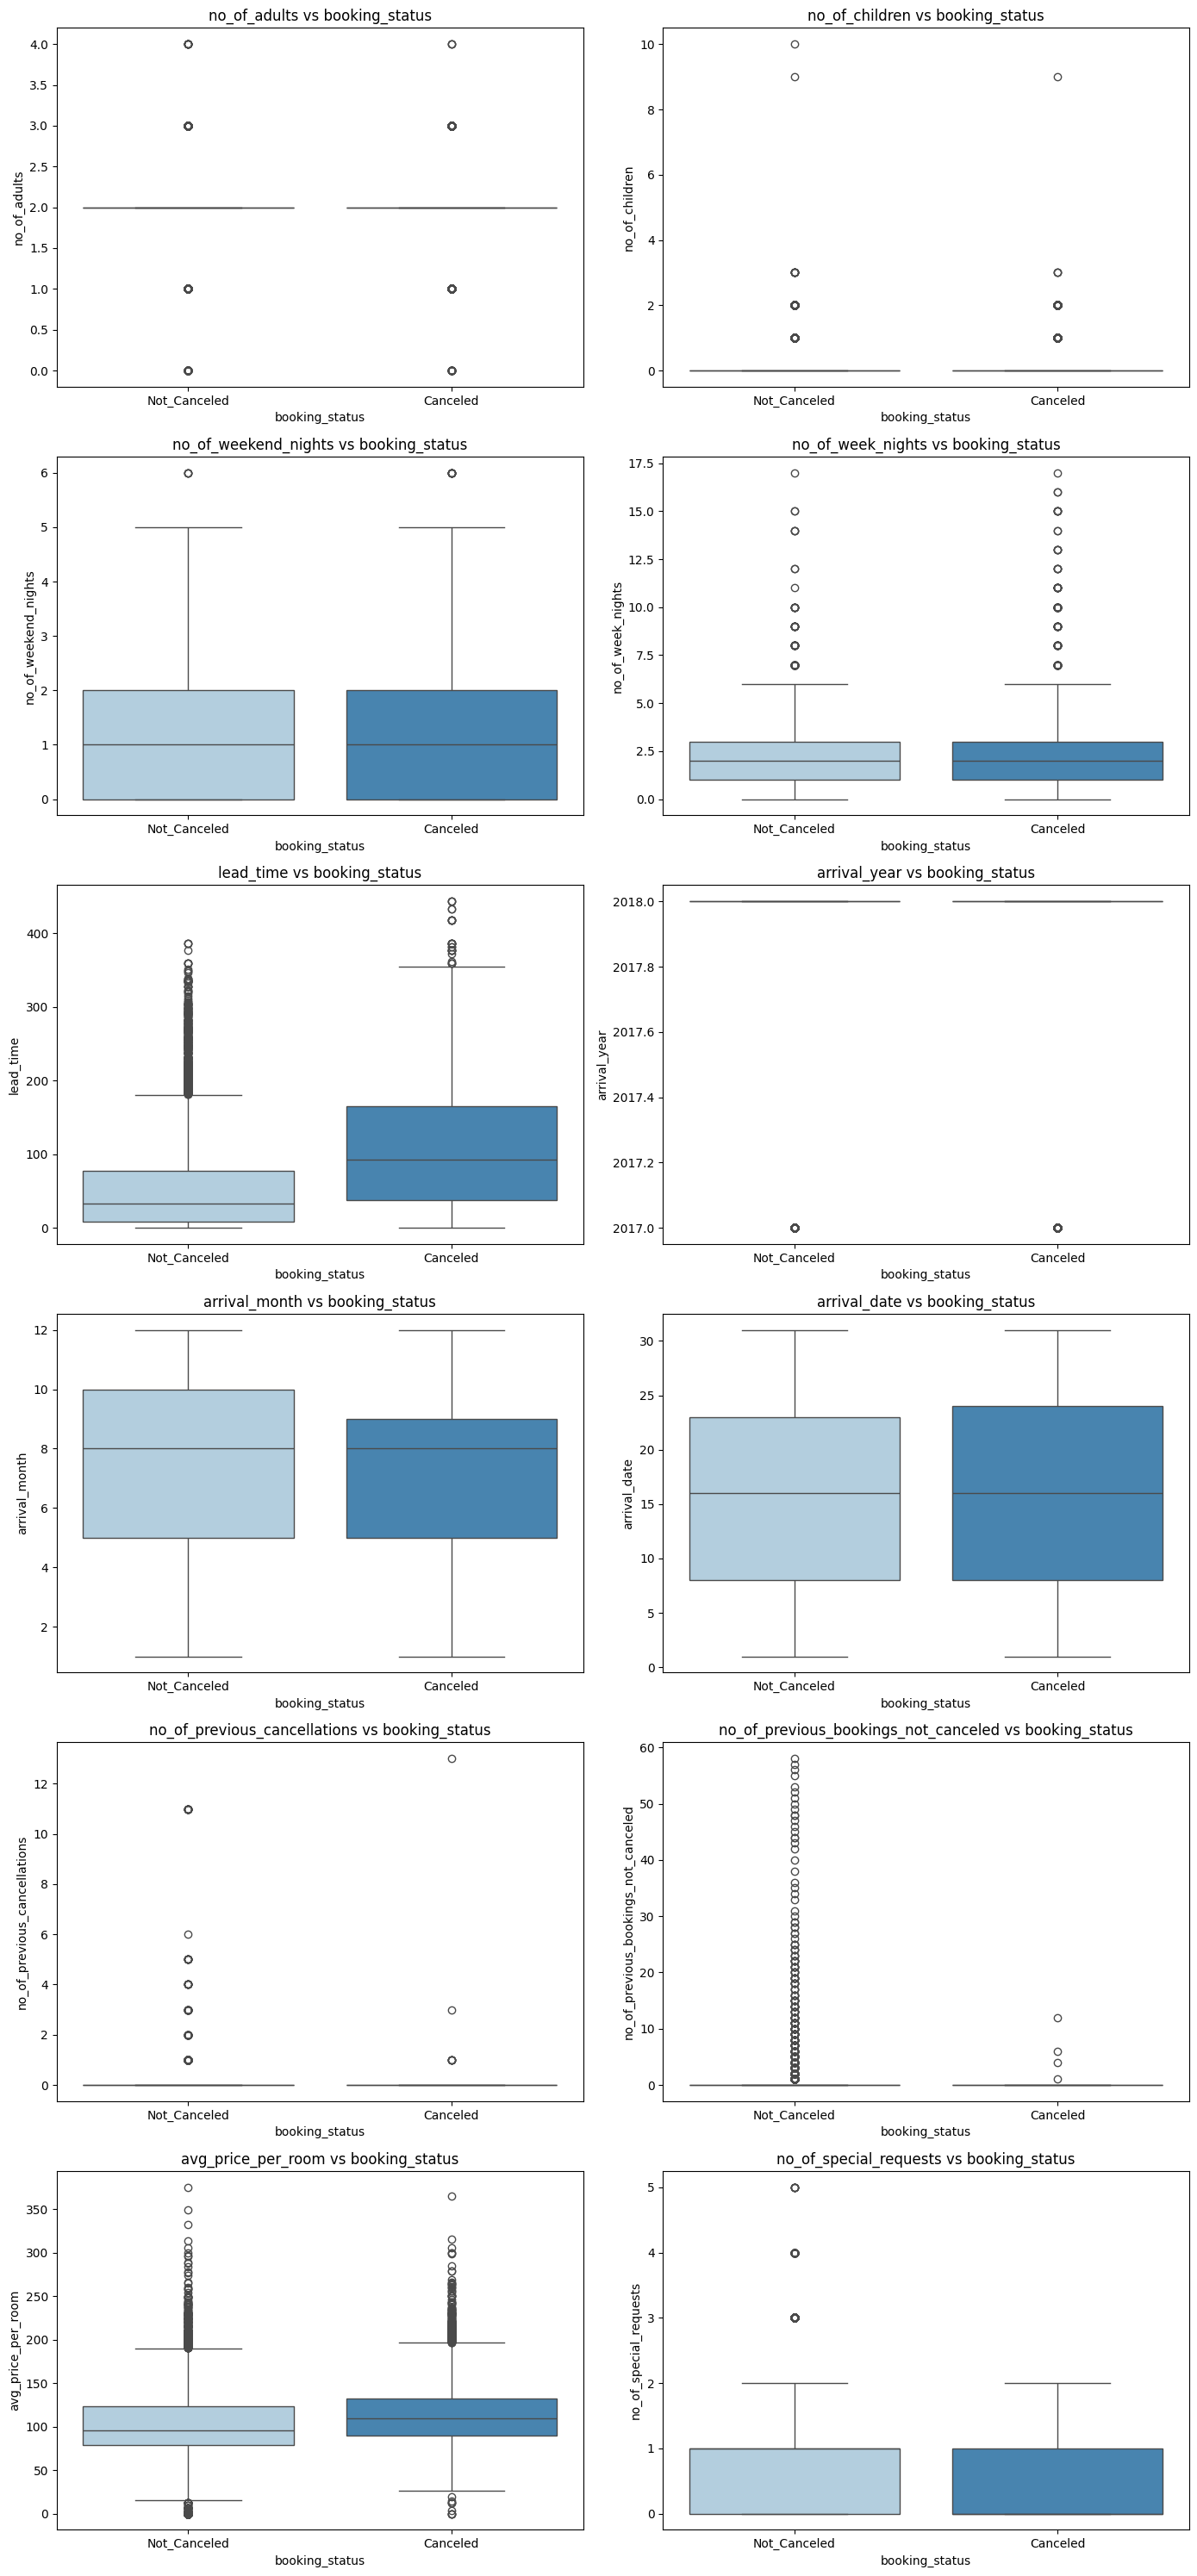

In [376]:
plot_bivariate_num(data , 'booking_status' , num_cols)

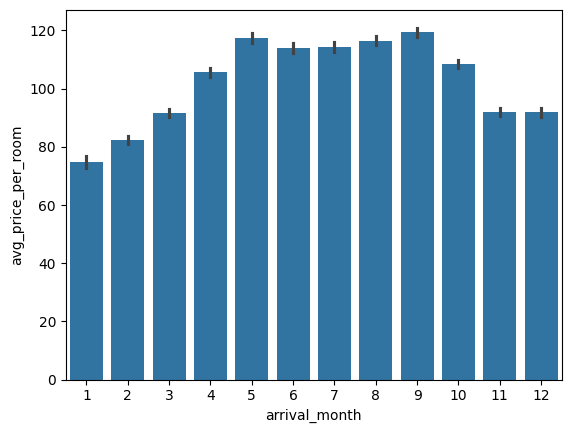

In [377]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [378]:
def plot_bivariate_cat(df, target, cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig,axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target , data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation = 90)

    plt.tight_layout()
    plt.show()




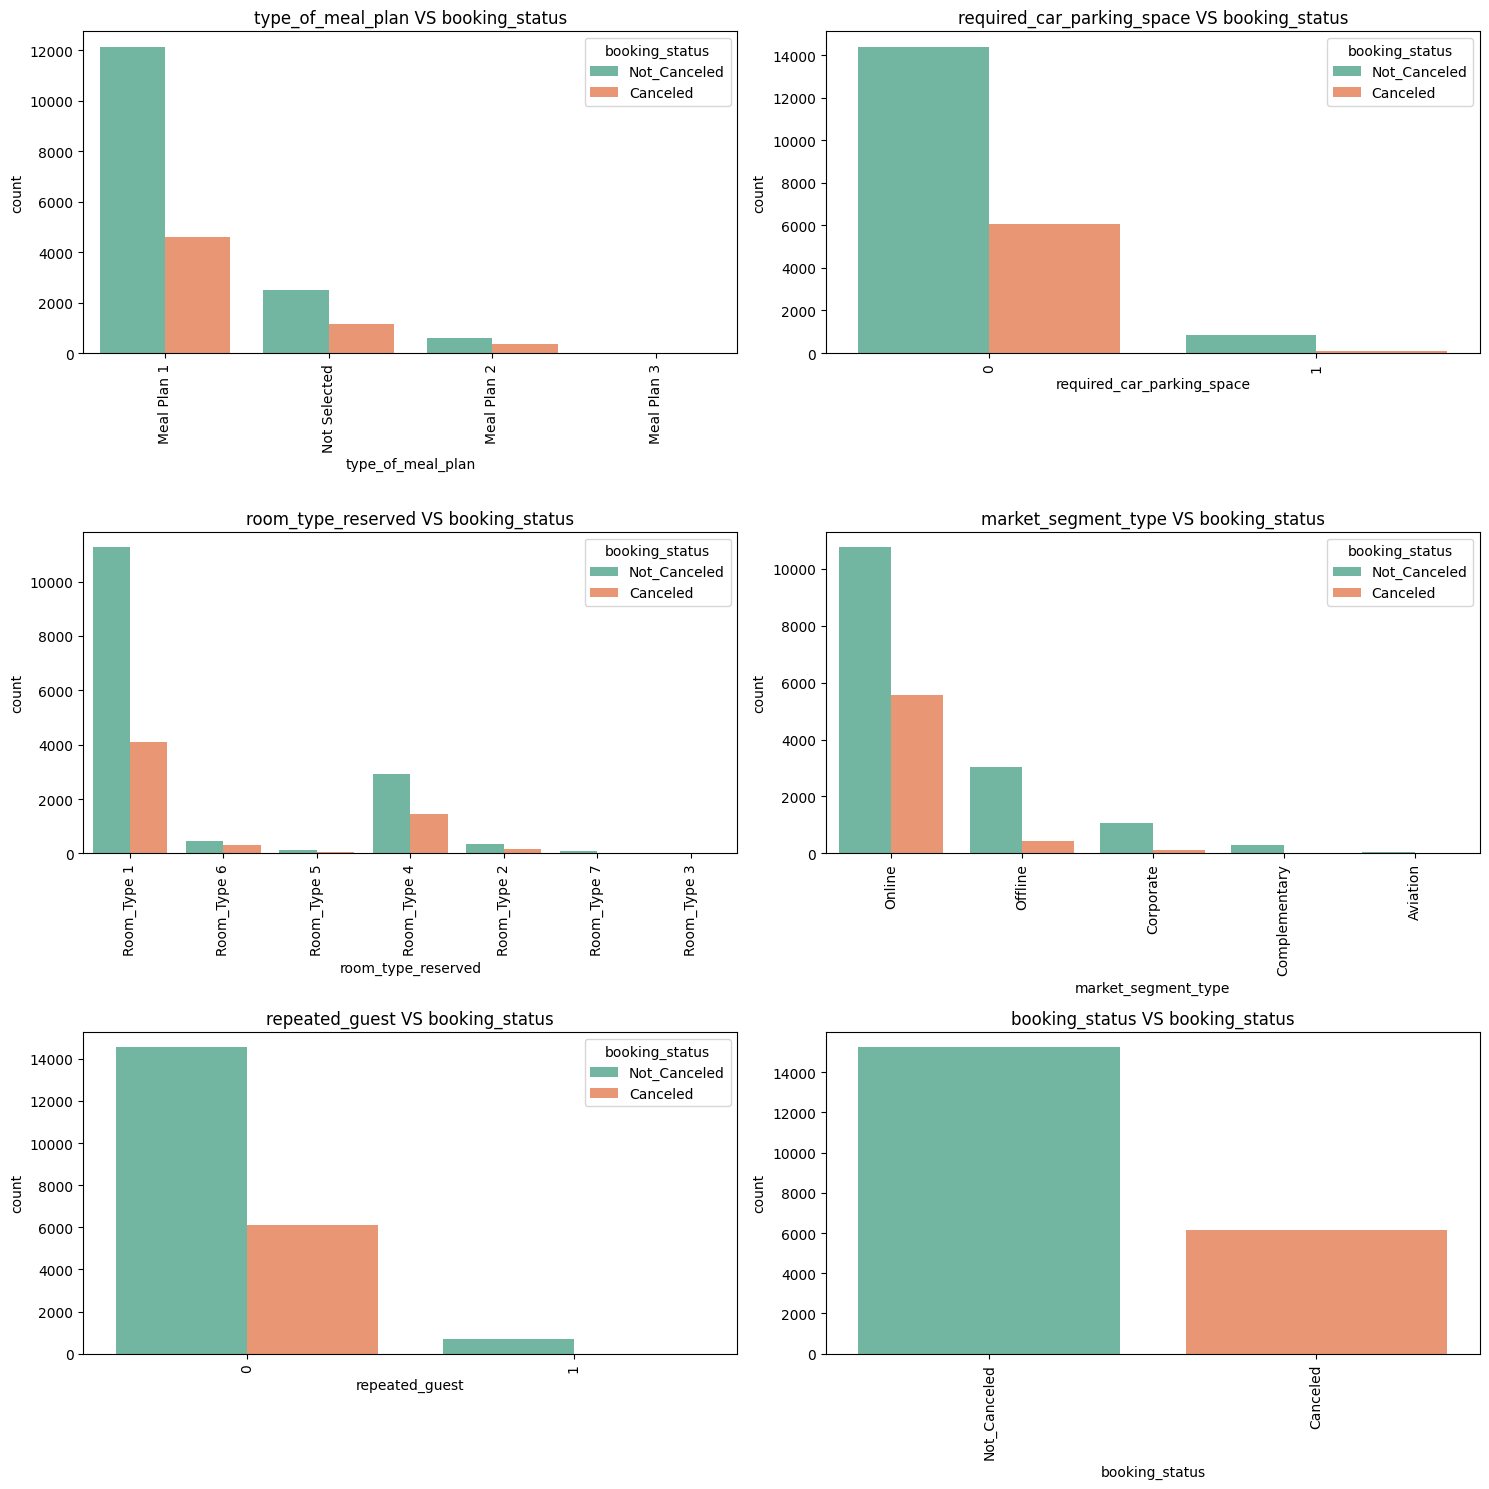

In [379]:
plot_bivariate_cat(data , 'booking_status' , cat_cols)


In [380]:
### DATA PROCESSING 

In [381]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [383]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [384]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}

In [385]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [386]:
for lable,code in mappings.items():
    mappings


In [387]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [389]:
#### Multicollinearity

In [390]:
!pip  install statsmodels

You should consider upgrading via the '/Users/kk/Downloads/MLOPS-PROJECT-1/.venv/bin/python3 -m pip install --upgrade pip' command.


In [391]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [392]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 


In [393]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [394]:
### Our data dont have any multi collinearity

In [395]:
## Correlation Matrix

In [396]:
corr = df.corr()

<Axes: >

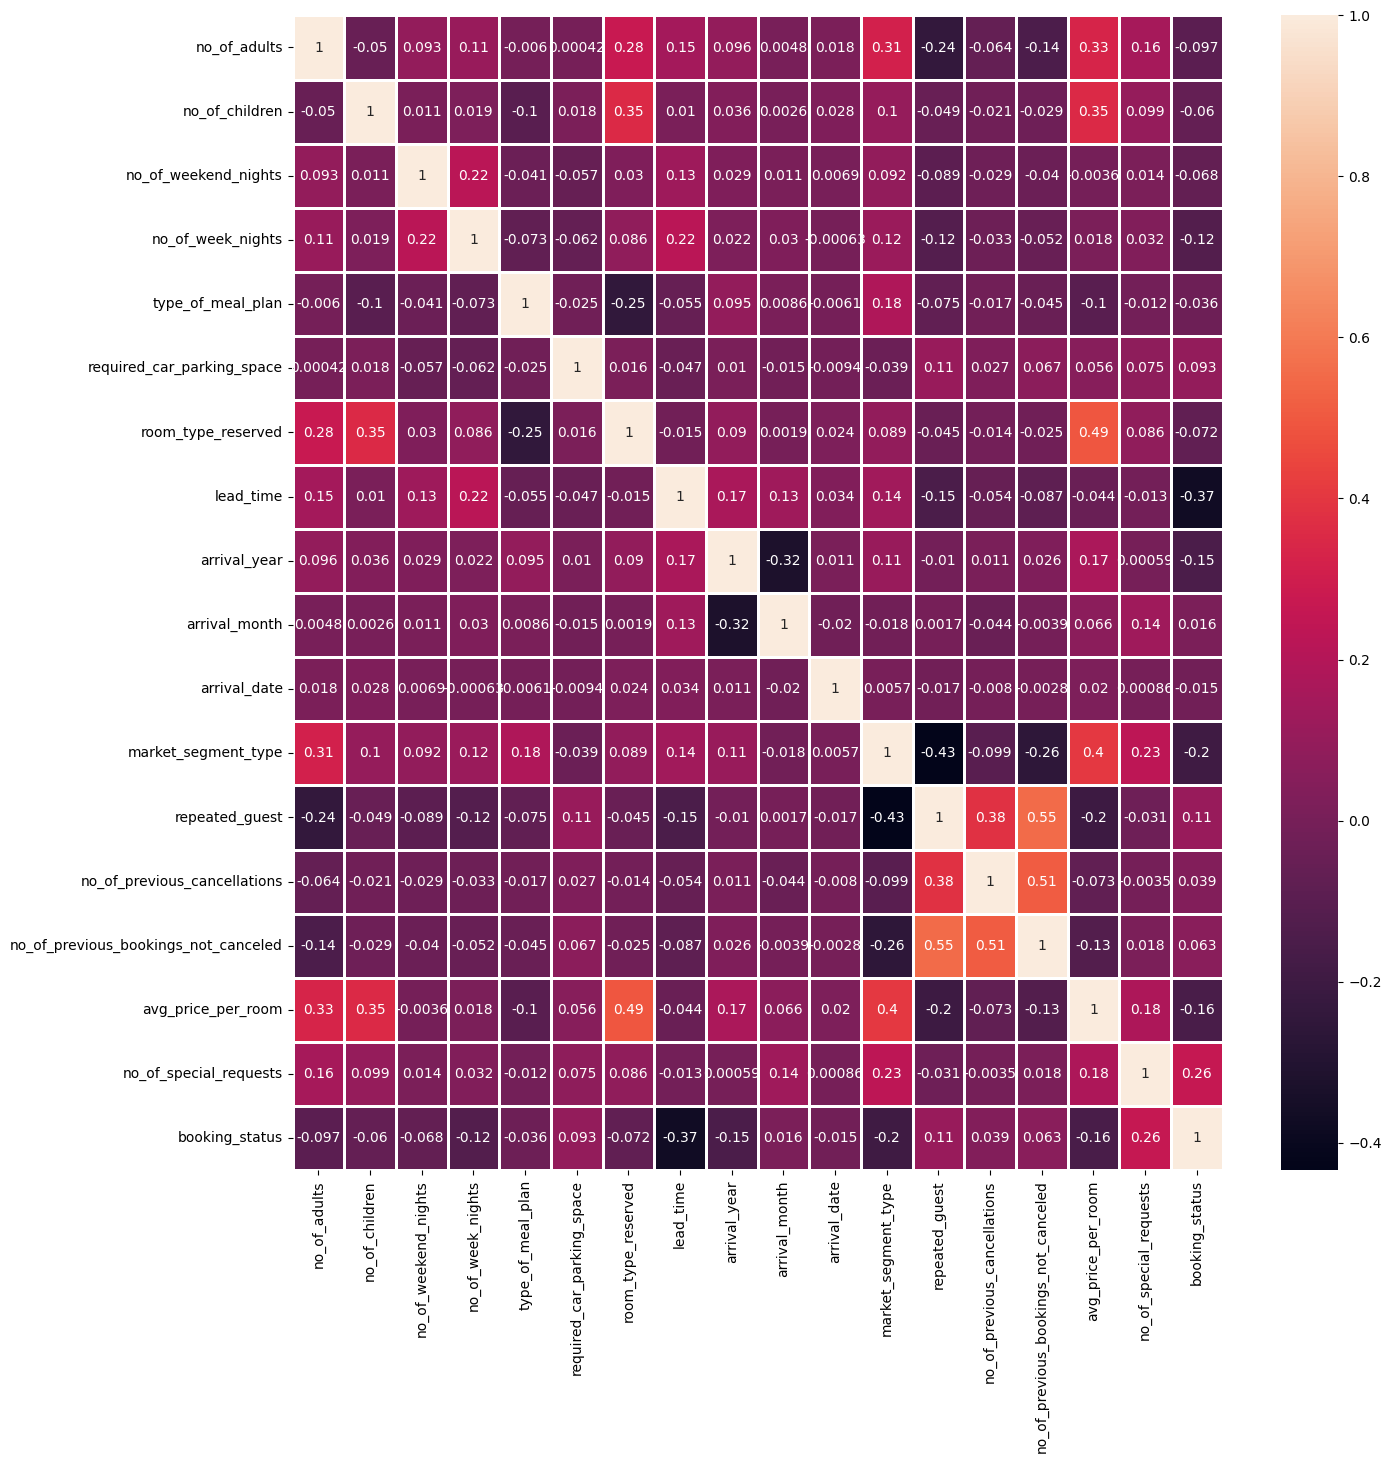

In [397]:
plt.figure(figsize=(15,15))
sns.heatmap(corr , annot=True, linewidths=1)

<Axes: >

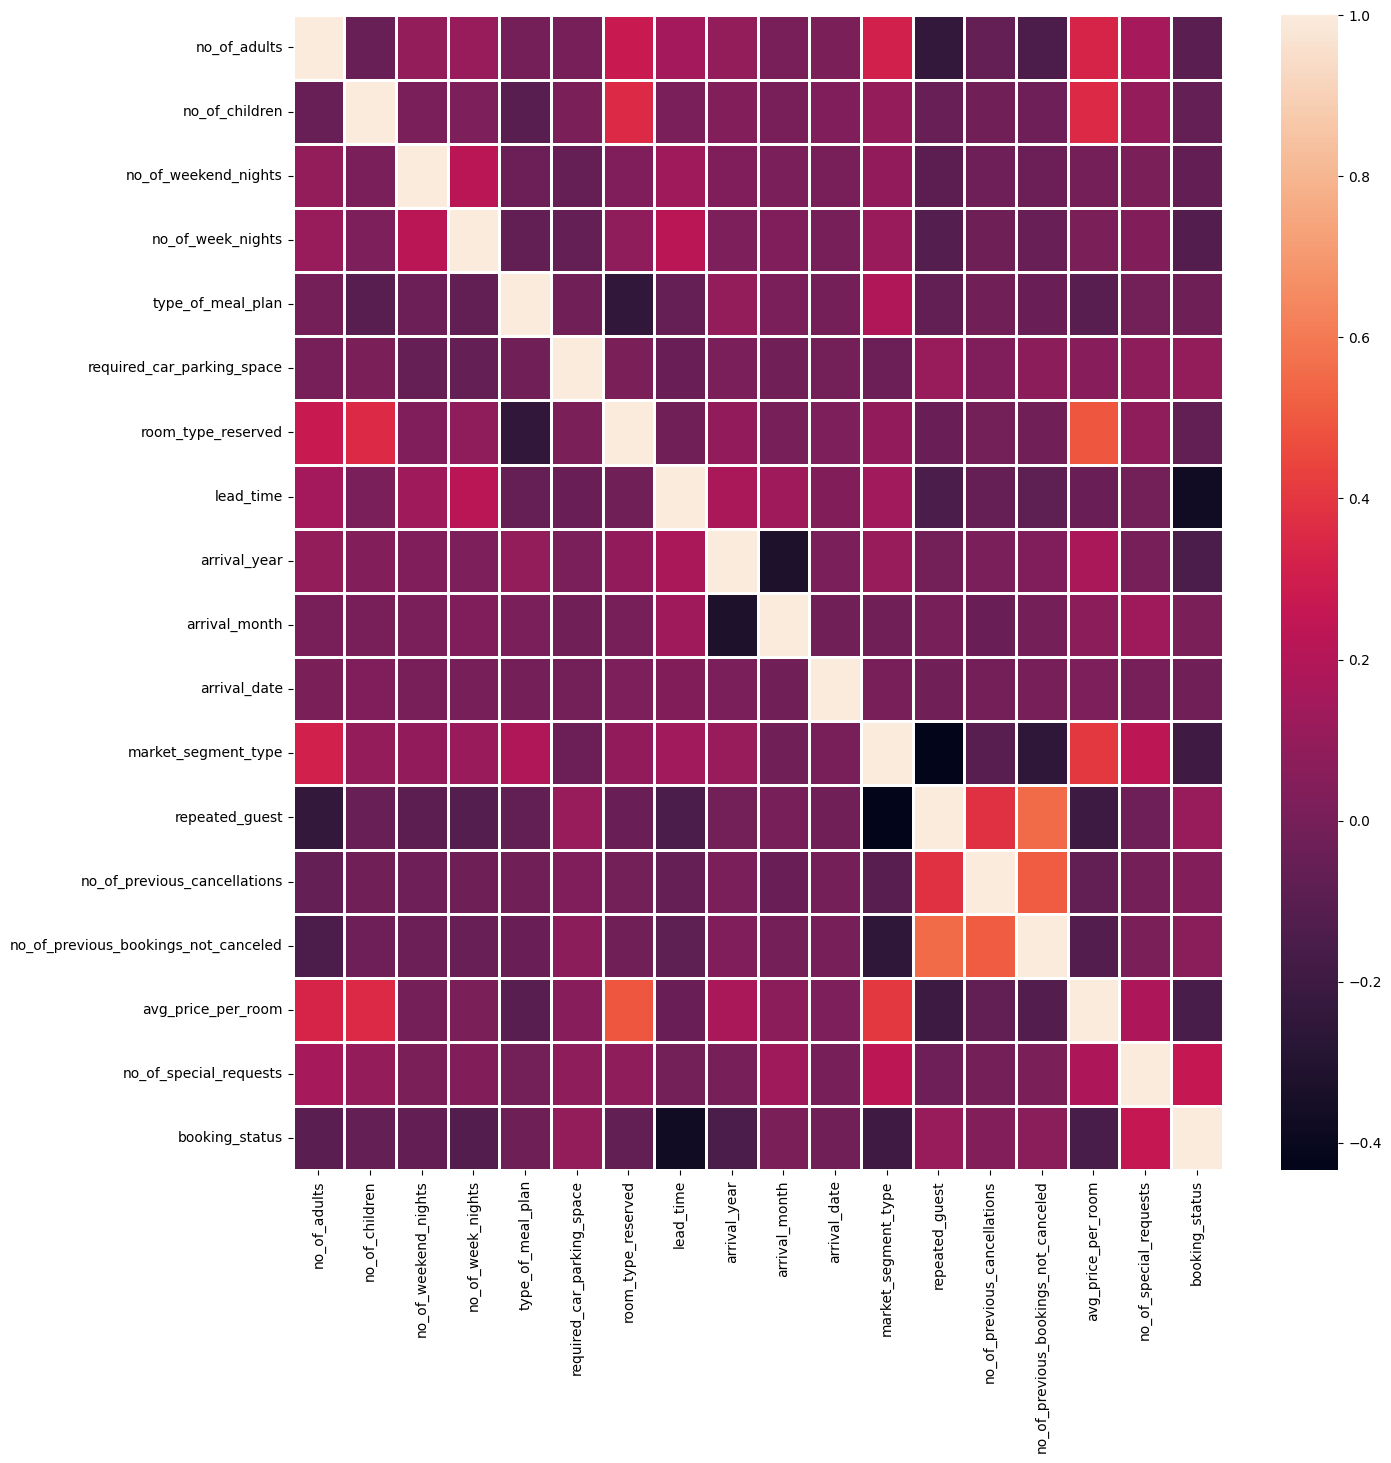

In [398]:
plt.figure(figsize=(15,15))
sns.heatmap(corr ,  linewidths=1)

In [399]:
### Skewness

In [400]:
skewness = df.skew()

In [401]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [402]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [403]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [404]:
### Imbalanced Data

In [405]:
df["booking_status"].value_counts()


booking_status
1    15231
0     6128
Name: count, dtype: int64

In [406]:
X = df.drop(columns='booking_status')
Y = df["booking_status"]

In [407]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [408]:
!pip install imbalanced-learn

You should consider upgrading via the '/Users/kk/Downloads/MLOPS-PROJECT-1/.venv/bin/python3 -m pip install --upgrade pip' command.


In [409]:
Y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [410]:
from imblearn.over_sampling import SMOTE

In [411]:
smote = SMOTE(random_state=42)

X_res, Y_res = smote.fit_resample(X,Y)


In [412]:
Y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [413]:
pd.Series(Y_res)

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int64

In [414]:
df.shape

(21359, 18)

In [415]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["balanced_status"] = Y_res

In [416]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,balanced_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [417]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30462 entries, 0 to 30461
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          30462 non-null  int64  
 1   no_of_children                        30462 non-null  int64  
 2   no_of_weekend_nights                  30462 non-null  int64  
 3   no_of_week_nights                     30462 non-null  int64  
 4   type_of_meal_plan                     30462 non-null  int64  
 5   required_car_parking_space            30462 non-null  int64  
 6   room_type_reserved                    30462 non-null  int64  
 7   lead_time                             30462 non-null  int64  
 8   arrival_year                          30462 non-null  int64  
 9   arrival_month                         30462 non-null  int64  
 10  arrival_date                          30462 non-null  int64  
 11  market_segment_

In [418]:
balanced_df.shape

(30462, 18)

In [419]:
df = balanced_df.copy()

In [420]:
df.shape

(30462, 18)

In [421]:
####Feature Selection

In [422]:
len(df.columns)

18

In [423]:
from sklearn.ensemble import RandomForestClassifier


In [424]:
#X = df.drop(columns='booking_status')
#Y = df['booking_status']

In [425]:
model = RandomForestClassifier(random_state=42)
model.fit(X,Y)

RandomForestClassifier(random_state=42)

In [426]:
feature_importance = model.feature_importances_ 

In [427]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})


In [428]:
feature_importance_df

,feature,importance
0,no_of_adults,0.020160
1,no_of_children,0.009406
2,no_of_weekend_nights,0.037498
3,no_of_week_nights,0.055905
4,type_of_meal_plan,0.016274
5,required_car_parking_space,0.008653
6,room_type_reserved,0.018321
7,lead_time,0.283652
8,arrival_year,0.021060
9,arrival_month,0.079595


In [429]:
feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
7,lead_time,0.283652
15,avg_price_per_room,0.161891
16,no_of_special_requests,0.120643
10,arrival_date,0.097250
9,arrival_month,0.079595
11,market_segment_type,0.064798
3,no_of_week_nights,0.055905
2,no_of_weekend_nights,0.037498
8,arrival_year,0.021060
0,no_of_adults,0.020160


In [430]:
# Top important features
feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
7,lead_time,0.283652
15,avg_price_per_room,0.161891
16,no_of_special_requests,0.120643
10,arrival_date,0.097250
9,arrival_month,0.079595
11,market_segment_type,0.064798
3,no_of_week_nights,0.055905
2,no_of_weekend_nights,0.037498
8,arrival_year,0.021060
0,no_of_adults,0.020160


In [431]:
# top important features
top_features_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [432]:
len(df.columns)

18

In [433]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,balanced_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [434]:
df.shape

(30462, 18)

In [435]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

top_features_importance_df.info()

In [436]:
top_features_importance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 7 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature     17 non-null     object 
 1   importance  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 408.0+ bytes


In [437]:
Y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [438]:
top_10_df.shape

(30462, 10)

In [439]:
top_10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30462 entries, 0 to 30461
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lead_time               30462 non-null  int64  
 1   avg_price_per_room      30462 non-null  float64
 2   no_of_special_requests  30462 non-null  int64  
 3   arrival_date            30462 non-null  int64  
 4   arrival_month           30462 non-null  int64  
 5   market_segment_type     30462 non-null  int64  
 6   no_of_week_nights       30462 non-null  int64  
 7   no_of_weekend_nights    30462 non-null  int64  
 8   arrival_year            30462 non-null  int64  
 9   no_of_adults            30462 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.3 MB


In [440]:
top_features_importance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 7 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature     17 non-null     object 
 1   importance  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 408.0+ bytes


In [441]:
# Top 10 Features
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

KeyError: "['booking_status'] not in index"

#### MODEL SELECTION

In [ ]:
!pip install xgboost lightgbm

     |████████████████████████████████| 1.9 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 2.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/kk/Downloads/MLOPS-PROJECT-1/.venv/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import  XGBClassifier
# from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [ ]:
Y.shape

(21359,)

In [ ]:
X.shape

(21359, 17)

In [ ]:
X = df.drop(columns='booking_status')
Y = df["booking_status"]

KeyError: "['booking_status'] not found in axis"

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2, random_state=42)

In [ ]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Logistic Regression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier" : SVC(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Baiyes" : GaussianNB(),
    "Adaboost" : AdaBoostClassifier(random_state=42)
}

In [ ]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [ ]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    recall1 = recall_score(Y_test,Y_pred)
    f1 = f1_score(Y_test,Y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall1)
    metrics["F1 Score"].append(f1)
                            


In [ ]:
metrics_df = pd.DataFrame(metrics)

In [ ]:
metrics

{'Model': ['Random Forest',
  'Logistic Regression',
  'Gradient Boosting',
  'Support Vector Classifier',
  'Decision Tree',
  'KNN',
  'Naive Baiyes',
  'Adaboost',
  'Random Forest',
  'Logistic Regression',
  'Gradient Boosting',
  'Support Vector Classifier',
  'Decision Tree',
  'KNN',
  'Naive Baiyes',
  'Adaboost'],
 'Accuracy': [0.8546348314606742,
  0.7853464419475655,
  0.8441011235955056,
  0.7296348314606742,
  0.8007958801498127,
  0.7406367041198502,
  0.4716760299625468,
  0.8050093632958801,
  0.8546348314606742,
  0.7853464419475655,
  0.8441011235955056,
  0.7296348314606742,
  0.8007958801498127,
  0.7406367041198502,
  0.4716760299625468,
  0.8050093632958801],
 'Precision': [0.8744493392070485,
  0.804856641310708,
  0.8633675692499222,
  0.7291459781529295,
  0.8631756756756757,
  0.778136937995886,
  0.9345794392523364,
  0.8222354340071344,
  0.8744493392070485,
  0.804856641310708,
  0.8633675692499222,
  0.7291459781529295,
  0.8631756756756757,
  0.778136937

In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.854635,0.874449,0.926025,0.899498
1,Logistic Regression,0.785346,0.804857,0.916694,0.857143
2,Gradient Boosting,0.844101,0.863368,0.924359,0.892823
3,Support Vector Classifier,0.729635,0.729146,0.978674,0.835681
4,Decision Tree,0.800796,0.863176,0.851383,0.857239
5,KNN,0.740637,0.778137,0.882373,0.826983
6,Naive Baiyes,0.471676,0.934579,0.266578,0.414830
7,Adaboost,0.805009,0.822235,0.921693,0.869128
8,Random Forest,0.854635,0.874449,0.926025,0.899498
9,Logistic Regression,0.785346,0.804857,0.916694,0.857143


# Train Random Forest Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
X = df.drop(columns='booking_status')
Y = df["booking_status"]

KeyError: "['booking_status'] not found in axis"

In [ ]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [ ]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   2.1s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x175570fa0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1755704c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31ebb5dc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31ebb5670>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 393}

In [ ]:
best_rf_model = random_search.best_estimator_

In [ ]:
Y_pred = best_rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test,Y_pred)
recall1 = recall_score(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)


In [ ]:
accuracy

0.860252808988764

In [ ]:
precision

0.8730602110490379

In [ ]:
recall1

0.9373542152615795

In [ ]:
f1

0.9040655632331673

Save this Model

In [ ]:
import joblib


In [ ]:
joblib.dump(best_rf_model,"random_forest.pk1")

['random_forest.pk1']

In [ ]:
loaded_model=joblib.load("random_forest.pk1")

In [ ]:
X_train[0:1]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
16440,2,0,1,0,3,0,0,3,2018,8,7,4,0.0,0.0,0.0,128.0,2


In [ ]:
new_data = np.array([2,0,1,0,3,0,0,3,2018,8,7,4,0.0,0.0,0.0,128.0,2]).reshape(1,-1)

In [ ]:
predictions=loaded_model.predict(new_data)

In [ ]:
predictions

array([1])